# Homework for next week: Introduction to Data Science for Sports

You will exercise your knowledge of probabilities and writing down logic with python.

<br />
<center>
    <img src="ipynb.images/f1races.png" width=800 />
</center>

oing to change driver standings by much, so you can use same standings for both races.

You need to provide *proof* for your answers. `I think it's one in a million because Mercedes sucks and I like Ferrari a lot more` is not a good answer. Leverage the counting framework in this workbook!

## Data and Prebuild Method：

In [45]:
class ProbDist(dict):
    """A Probability Distribution; an {outcome: probability} mapping."""
    def __init__(self, mapping=(), **kwargs):
        self.update(mapping, **kwargs)
        # Make probabilities sum to 1.0; assert no negative probabilities
        total = sum(self.values())
        for outcome in self:
            self[outcome] = self[outcome] / total
            assert self[outcome] >= 0

In [46]:
def p(event, space): 
    """The probability of an event, given a sample space of equiprobable outcomes. 
    event: a collection of outcomes, or a predicate that is true of outcomes in the event. 
    space: a set of outcomes or a probability distribution of {outcome: frequency} pairs."""
    if is_predicate(event):
        event = such_that(event, space)
    if isinstance(space, ProbDist):
        return sum(space[o] for o in space if o in event)
    else:
        return Fraction(len(event & space), len(space))

is_predicate = callable

def such_that(predicate, space): 
    """The outcomes in the sample pace for which the predicate is true.
    If space is a set, return a subset {outcome,...} with outcomes where predicate(element) is true;
    if space is a ProbDist, return a ProbDist {outcome: frequency,...} with outcomes where predicate(element) is true."""
    if isinstance(space, ProbDist):
        return ProbDist({o:space[o] for o in space if predicate(o)})
    else:
        return {o for o in space if predicate(o)}
    
def joint(A, B, sep=''):
    """The joint distribution of two independent probability distributions. 
    Result is all entries of the form {a+sep+b: P(a)*P(b)}"""
    return ProbDist({a + sep + b: A[a] * B[b]
                    for a in A
                    for b in B})

In [47]:
SGP = ProbDist(
    LH = 413,
    VB = 326,
    MV = 278,
    CL = 264,
    SV = 240,
    CS = 96,
    PG = 95,
    AA = 92,
    DR = 54,
    SP = 52,
    LN = 49,
    KR = 43,
    Dk = 37,
    NH = 37,
    LS = 21,
    KM = 20,
    AG = 14,
    RG = 8,
    Rk = 1,
    GR = 0)
SGP

{'LH': 0.1929906542056075,
 'VB': 0.15233644859813084,
 'MV': 0.12990654205607477,
 'CL': 0.1233644859813084,
 'SV': 0.11214953271028037,
 'CS': 0.044859813084112146,
 'PG': 0.04439252336448598,
 'AA': 0.04299065420560748,
 'DR': 0.025233644859813085,
 'SP': 0.024299065420560748,
 'LN': 0.022897196261682243,
 'KR': 0.020093457943925235,
 'Dk': 0.017289719626168223,
 'NH': 0.017289719626168223,
 'LS': 0.009813084112149532,
 'KM': 0.009345794392523364,
 'AG': 0.0065420560747663555,
 'RG': 0.003738317757009346,
 'Rk': 0.00046728971962616824,
 'GR': 0.0}

Question 1.1 (20 points) There are a number of F1 races coming up: 
- Singapore GP: Date: Sun, Sep 22, 8:10 AM
- Russian GP: Date: Sun, Sep 29, 7:10 AM
- Japanese GP: Date: Sun, Oct 13, 1:10 AM
- Mexican GP Date: Sun, Oct 13, 1:10 AM

We are just before the Singaporean Grand Prix (this coming weekend) and the Russian Grand Prix the weekend after, as you can see [schedule](https://www.formula1.com/en/racing/2019.html). 

The 2019 driver standings are given [here](https://www.formula1.com/en/results.html/2019/drivers.html). Assume these standings for this weekend, even though they are final season standings. Given these standings (please do not use team standings given on the same Web site, use ***driver standings***), what is the Probability Distribution for each F1 driver to win the Singaporean Grand Prix? What is the Probability Distribution for each F1 driver to win *both* the Singaporean and Russian Grand Prix? What is the probability for Mercedes to win both races? What is the probability for Mercedes to win at least one race? Note that Mercedes, and each other racing team, has two drivers per race. Assume that Singaporean grand prix standings are not g

### Probability Distribution for each F1 driver to win both the Singaporean and Russian Grand Prix：

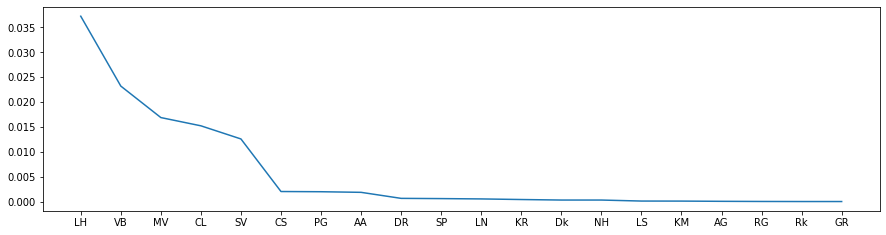

In [70]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 3.75))
plt.plot(list(SGP.keys()),list([i**2 for i in SGP.values()])) #plot(x,y)

### The probability for Mercedes to win both races :

In [71]:
#The prob of Mercedes win both equals to the combination prob of two drivers win both
prob1 = (SGP["LH"]+SGP["VB"]) ** 2
prob1

0.11925080793082367

### The probability for Mercedes to win at least one race：

In [72]:
#The prob of Mercedes win at least one race = 1-loseboth
loseboth = (1-(SGP["LH"]+SGP["VB"])) ** 2
prob2 = 1-loseboth
prob2

0.571403397676653

Question 1.2 (30 points) If Mercedes wins the first race, what is the probability that Mercedes wins the next one? If Mercedes wins at least one of these two races, what is the probability Mercedes wins both races? How about Ferrari, Alfa Romeo, and McLaren?


### If Mercedes wins the first race, what is the probability that Mercedes wins the next one

In [75]:
#Since there are no connection between two races, the Est prob of Mercedes win next will be same
prob3 = (SGP["LH"]+SGP["VB"])
prob3

0.34532710280373835

###  If Mercedes wins at least one of these two races, what is the probability Mercedes wins both races

In [77]:
#According to the Bayes Formula, P(A | B) = P(B | A) * P(A) / P(B)
#B:Mercedes wins at least one of these two races
#A:Mercedes wins both races
prob3 = (1*prob1/prob2)
prob3

0.2086981078791302

In [ ]:
#with joint method, the probability Mercedes wins both races
SGP_dict = joint(SGP,SGP,' ')
SGP_dict

In [76]:
def m_once (outcome):
    return ('LH')in outcome or ('VB')in outcome
def m_both (outcome):
    return ('LH LH')in outcome or('LH VB')in outcome or('VB LH')in outcome or('VB VB')in outcome 
p(m_both, such_that(m_once, SGP_dict))

0.20869810787913018

 ### How about Ferrari, Alfa Romeo, and McLaren?

In [83]:
#ferrari:
def m_once (outcome):
    return ('CL')in outcome or ('SV')in outcome
def m_both (outcome):
    return ('CL CL')in outcome or('CL SV')in outcome or('SV CL')in outcome or('SV SV')in outcome 
p(m_both, such_that(m_once, SGP_dict))

0.1334745762711864

In [ ]:
#alfa:
def m_once (outcome):
    return ('KR')in outcome or ('AG')in outcome
def m_both (outcome):
    return ('KR KR')in outcome or('KR AG')in outcome or('AG KR')in outcome or('AG AG')in outcome 
p(m_both, such_that(m_once, SGP_dict))

In [ ]:
#McLaren:
def m_once (outcome):
    return ('LH')in outcome or ('VB')in outcome
def m_both (outcome):
    return ('LH LH')in outcome or('LH VB')in outcome or('VB LH')in outcome or('VB VB')in outcome 
p(m_both, such_that(m_once, SGP_dict))

Question 1.3 (50 points) Mercedes wins at least one of these two races on a **rainy** day. What is the probability Mercedes wins both races, assuming races can be held on either rainy, sunny, cloudy, snowy or foggy days? Assume that rain, sun, clouds, snow, and fog are the *only possible weather conditions* on race tracks.


In [79]:
weather = ProbDist(
    rain = 0.2,
    sun = 0.2,
    clouds = 0.2,
    snow = 0.2,
    fog = 0.2
)

In [80]:
SGP1 = joint(SGP,weather,' ')
SGP2 = joint(weather,SGP,' ')
twoday = joint(SGP1,SGP2,' ')
twoday

{'LH rain rain LH': 0.0014898157044283642,
 'LH rain rain VB': 0.00117598043497251,
 'LH rain rain MV': 0.0010028299414796254,
 'LH rain rain CL': 0.000952327714210867,
 'LH rain rain SV': 0.0008657524674644246,
 'LH rain rain CS': 0.0003463009869857698,
 'LH rain rain PG': 0.0003426936850380014,
 'LH rain rain AA': 0.00033187177919469615,
 'LH rain rain DR': 0.00019479430517949553,
 'LH rain rain SP': 0.00018757970128395867,
 'LH rain rain LN': 0.00017675779544065336,
 'LH rain rain KR': 0.00015511398375404274,
 'LH rain rain Dk': 0.00013347017206743212,
 'LH rain rain NH': 0.00013347017206743212,
 'LH rain rain LS': 7.575334090313716e-05,
 'LH rain rain KM': 7.21460389553687e-05,
 'LH rain rain AG': 5.05022272687581e-05,
 'LH rain rain RG': 2.885841558214749e-05,
 'LH rain rain Rk': 3.607301947768436e-06,
 'LH rain rain GR': 0.0,
 'LH rain sun LH': 0.0014898157044283642,
 'LH rain sun VB': 0.00117598043497251,
 'LH rain sun MV': 0.0010028299414796254,
 'LH rain sun CL': 0.00095232771

In [82]:
def m_both (outcome):
    return ((outcome.startswith('LH') and outcome.endswith('LH')) or
            (outcome.startswith('LH') and outcome.endswith('VB')) or
            (outcome.startswith('VB') and outcome.endswith('LH')) or
            (outcome.startswith('VB') and outcome.endswith('VB')))
def m_rain (outcome):
     return ((outcome.startswith('LH rain') or outcome.endswith('rain LH')) or
            (outcome.startswith('LH rain') or outcome.endswith('rain VB')) or
            (outcome.startswith('VB rain') or outcome.endswith('rain LH')) or
            (outcome.startswith('VB rain') or outcome.endswith('rain VB')) )
p(m_both, such_that(m_rain, twoday))

0.3219108465224337